# Lab 4 - Linear models

We focus on models in the form 

$$ y ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

or in generalized form (generalized linear models)

$$ f(y) ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

where $f(y)$ is a link function, for example - logit.


In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [3]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
Widget Javascript not detected.  It may not be installed or enabled properly.


ERROR:cmdstanpy:Error in progress bar initialization:
	'FloatProgress' object has no attribute 'style'
Disabling progress bars for this session


INFO:cmdstanpy:CmdStan done processing.


#### Task 1. Prior predictive checks

1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors
4. Check if observed data is possible to obtain using priors.

In [4]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


In [6]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-900.0,0.0270,0.97,-900.0,-900.0,-900.0,1300.0,12000.0,1.0
mu,150.0,0.0071,0.40,150.0,150.0,160.0,3300.0,31000.0,1.0
sigma,7.8,0.0051,0.29,7.3,7.8,8.3,3300.0,31000.0,1.0
height,150.0,0.1200,7.70,140.0,150.0,170.0,3900.0,37000.0,1.0


In [7]:
mu = fit.stan_variable("mu")
sigma = fit.stan_variable("sigma")
height = fit.stan_variable("height")

Exception ignored in: <function tqdm.__del__ at 0x7f2060237e50>
Traceback (most recent call last):
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 160, in display
    d = self.format_dict
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/std.py", line 1476, in format_dict
    'colour': self.colour}
  File "/home/mat_komp/.local/lib/python3.8/site-packages/tqdm/notebook.py", line 203, in colour
    return self.container.children[-2].style.bar_color
AttributeError: 'FloatProgress' object has no attribute 'style'


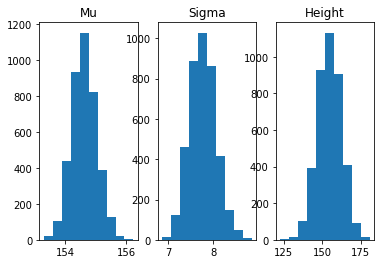

In [8]:
fig, axs = plt.subplots(1, 3)
axs[0].hist(mu)
axs[0].set_title("Mu")
axs[1].hist(sigma)
axs[1].set_title("Sigma")
axs[2].hist(height)
axs[2].set_title("Height")
plt.show()

<AxesSubplot:xlabel='mu', ylabel='sigma'>

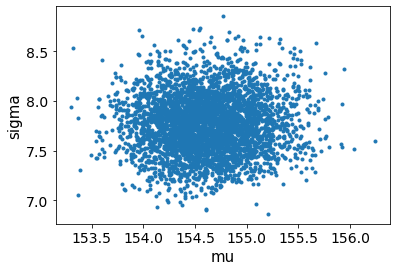

In [9]:
az.plot_pair(fit, var_names=["mu", "sigma"])

#### Task 2. Model fit and evaluation

1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



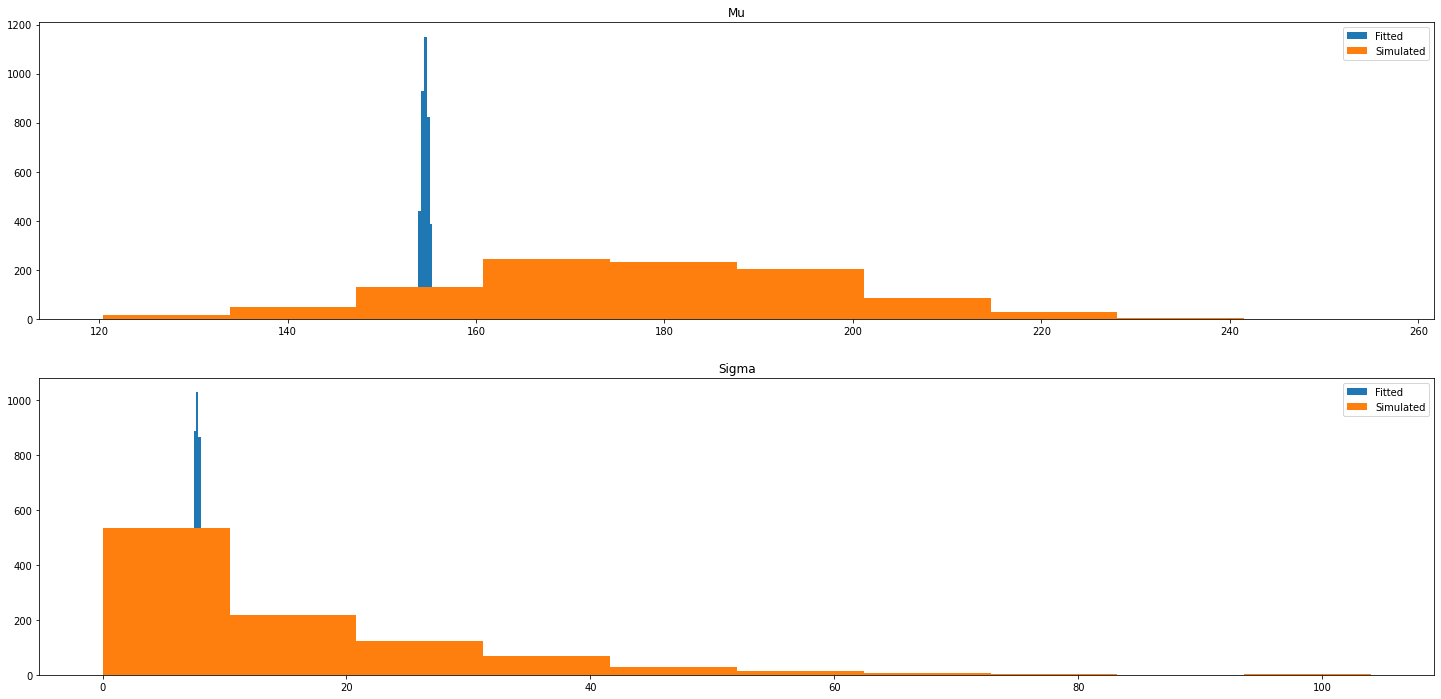

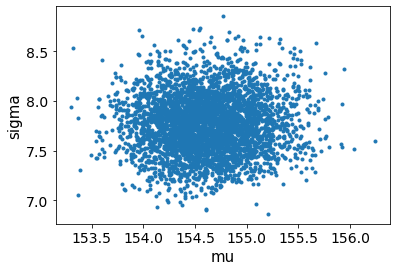

In [11]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(25, 12)
axs[0].hist(fit.stan_variable("mu"))
axs[0].hist(sim.stan_variable("mu"))
axs[0].legend(['Fitted','Simulated'])
axs[0].set_title("Mu")
axs[1].hist(fit.stan_variable("sigma"))
axs[1].hist(sim.stan_variable("sigma"))
axs[1].legend(['Fitted','Simulated'])
axs[1].set_title("Sigma")
plt.show()
az.plot_pair(fit, var_names=["mu", "sigma"])
plt.show()

### Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [12]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
d['c_weight'] = d['weight'] - np.mean(d['weight'])
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


#### Task 4. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

### Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [ ]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

In [ ]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

#### Task 5. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

Minimum height: -500.024 
Maximum height:  833.297


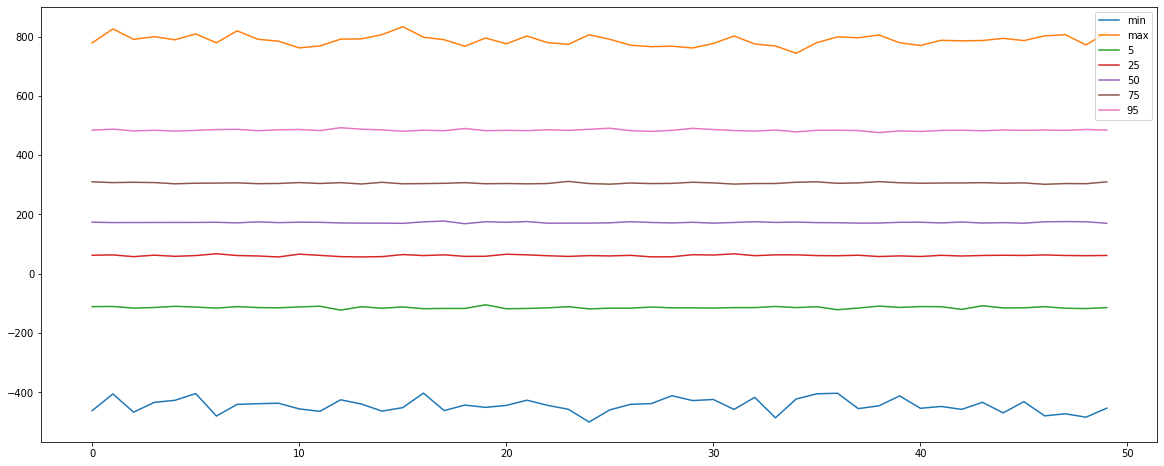

In [16]:
height = sim.stan_variable("height")
print(
    "Minimum height: {0} \nMaximum height:  {1}".format(np.min(height), np.max(height))
)

minimum = []
maximum = []
quantile_5 = []
quantile_25 = []
quantile_50 = []
quantile_75 = []
quantile_95 = []

for i in range(len(height[0])):
    minimum.append(np.min(height[:,i]))
    maximum.append(np.max(height[:,i]))
    quantile_5.append(np.quantile(height[:, i], 0.05))
    quantile_25.append(np.quantile(height[:, i], 0.25))
    quantile_50.append(np.quantile(height[:, i], 0.5))
    quantile_75.append(np.quantile(height[:, i], 0.75))
    quantile_95.append(np.quantile(height[:, i], 0.95))

plt.plot(minimum)
plt.plot(maximum)
plt.plot(quantile_5)
plt.plot(quantile_25)
plt.plot(quantile_50)
plt.plot(quantile_75)
plt.plot(quantile_95)
plt.legend(['min','max','5','25','50','75','95'])
plt.show()

### Fitting data


In [18]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


#### Task 6. Preparing data for fit
1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe

In [19]:
def get_data_fit(N):
    return {'N':N, 'weight':d['weight'].iloc[:N], 'heights':d.height[:N].values}

#### Task 7. Evaluating model

1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.

In [20]:
def plot_all_the_stuff(height_):
    print(
    "Minimum height: {0} \nMaximum height:  {1}".format(np.min(height_), np.max(height_))
    )
    minimum_ = []
    maximum_ = []
    quantile_5_ = []
    quantile_25_ = []
    quantile_50_ = []
    quantile_75_ = []
    quantile_95_ = []
    for i in range(len(height_[0])):
        minimum_.append(np.min(height_[:, i]))
        maximum_.append(np.max(height_[:, i]))
        quantile_5_.append(np.quantile(height_[:, i], 0.05))
        quantile_25_.append(np.quantile(height_[:, i], 0.25))
        quantile_50_.append(np.quantile(height_[:, i], 0.5))
        quantile_75_.append(np.quantile(height_[:, i], 0.75))
        quantile_95_.append(np.quantile(height_[:, i], 0.95))
    plt.plot(minimum_)
    plt.plot(maximum_)
    plt.plot(quantile_5_)
    plt.plot(quantile_25_)
    plt.plot(quantile_50_)
    plt.plot(quantile_75_)
    plt.plot(quantile_95_)
    plt.legend(['min','max','5','25','50','75','95'])
    plt.show()

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


Minimum height: -26.6159 
Maximum height:  368.696


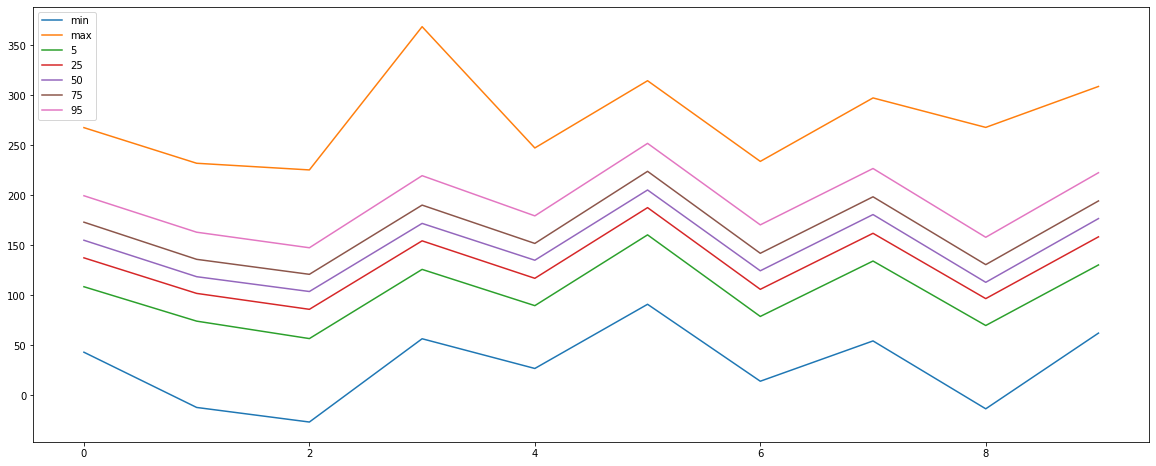

In [21]:
fit=model_2_fit.sample(data=get_data_fit(10),seed=28052020)
plot_all_the_stuff(fit.stan_variable("height"))

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing


Minimum height: 21.4021 
Maximum height:  313.915


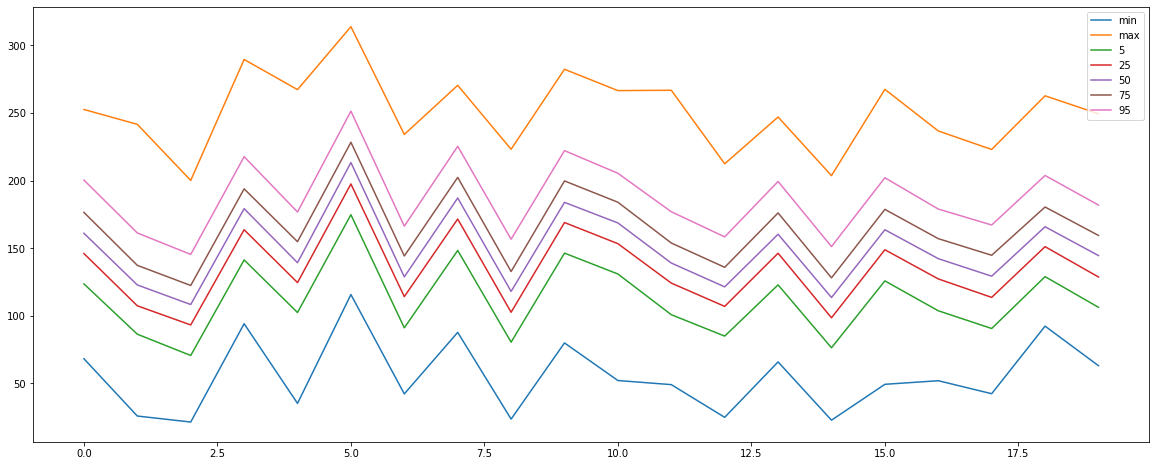

In [22]:
fit=model_2_fit.sample(data=get_data_fit(20),seed=28052020)
plot_all_the_stuff(fit.stan_variable("height"))

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing


Minimum height: 10.4355 
Maximum height:  302.372


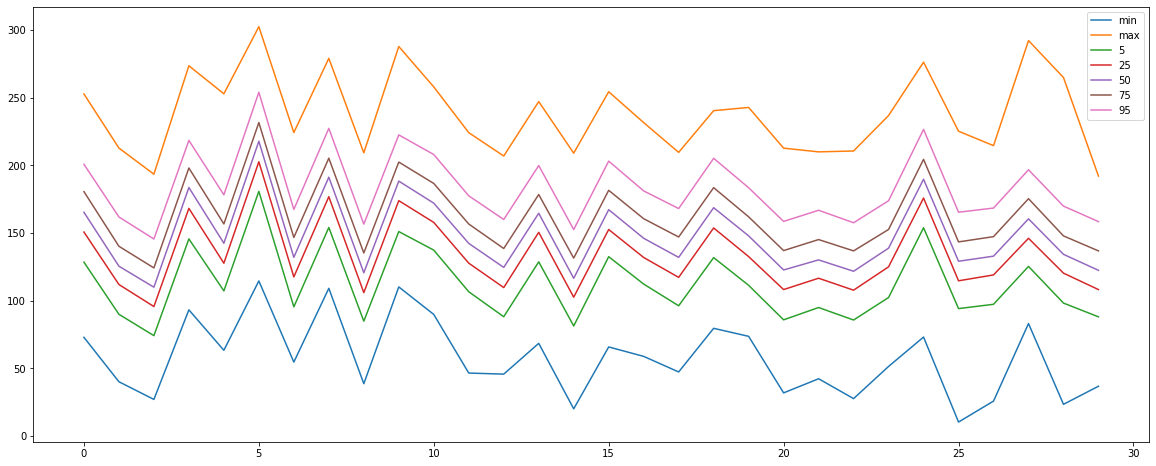

In [23]:
fit=model_2_fit.sample(data=get_data_fit(30),seed=28052020)
plot_all_the_stuff(fit.stan_variable("height"))

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing


Minimum height: 35.4939 
Maximum height:  283.946


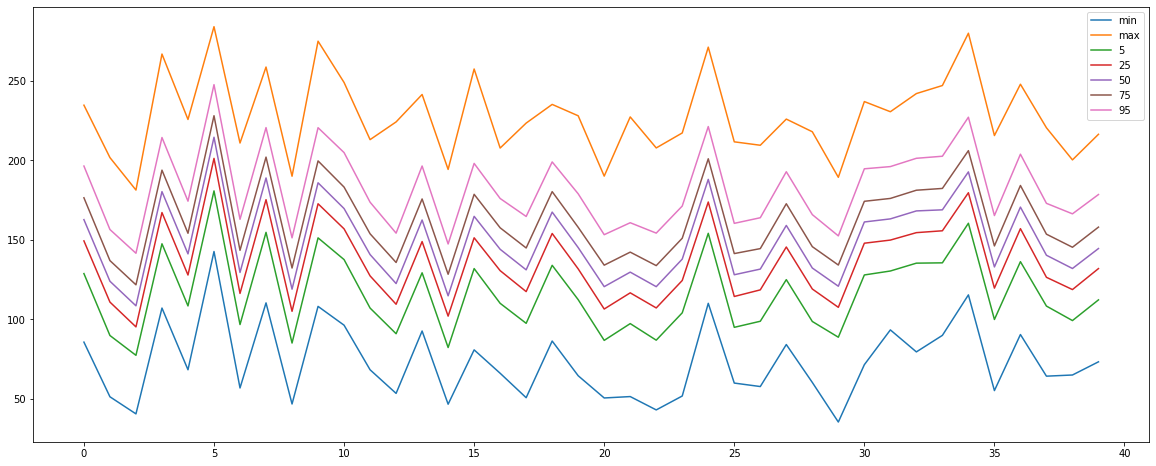

In [24]:
fit=model_2_fit.sample(data=get_data_fit(40),seed=28052020)
plot_all_the_stuff(fit.stan_variable("height"))